# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Problem Statement

#### Identifying Key metrices from the dataset and providing insights to further increase revenue via sales

## Now Performing EDA

In [2]:
# Loading the dataset 
df = pd.read_excel(r'C:\Users\ntpc\Desktop\Global Superstore Orders 2016.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
# Checking the  shape  of dataset
df.shape

(51290, 24)

In [4]:
# Checking if the dataset contains any null values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
#Now dropping the Postal Code Column since it is not necessary for our analysis
df.drop(columns='Postal Code',inplace=True)

In [7]:
# Now Checking if the dataset contains any null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

## Shipping Mode

In [8]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [9]:
x= df['Ship Mode'].value_counts().index

In [10]:
y=df['Ship Mode'].value_counts().values

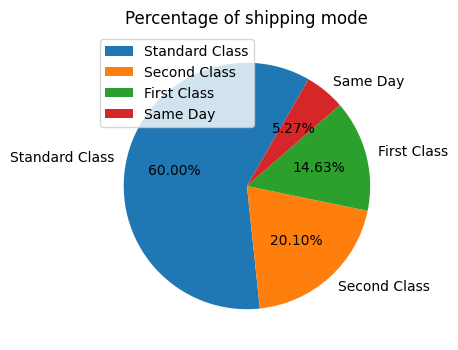

In [11]:
# Checking the Percentage of each shipping Mode
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.title("Percentage of shipping mode")
plt.savefig("Percentage of shipping mode.jpg")
plt.show()

## Count of shipping mode for each Product Category

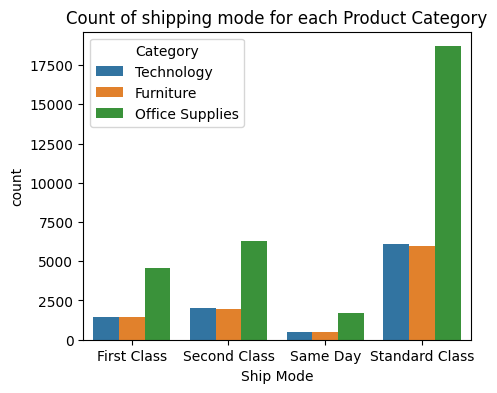

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode',data=df,hue='Category')
plt.title("Count of shipping mode for each Product Category")
plt.savefig("Count of shipping mode for each Product Category.jpg")
plt.show()

## Customer Segment

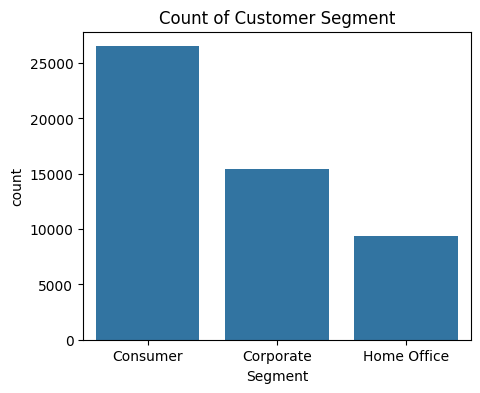

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='Segment',data=df)
plt.title("Count of Customer Segment")
plt.savefig("Count of Customer Segment.jpg")
plt.show()

## Count of Product Category

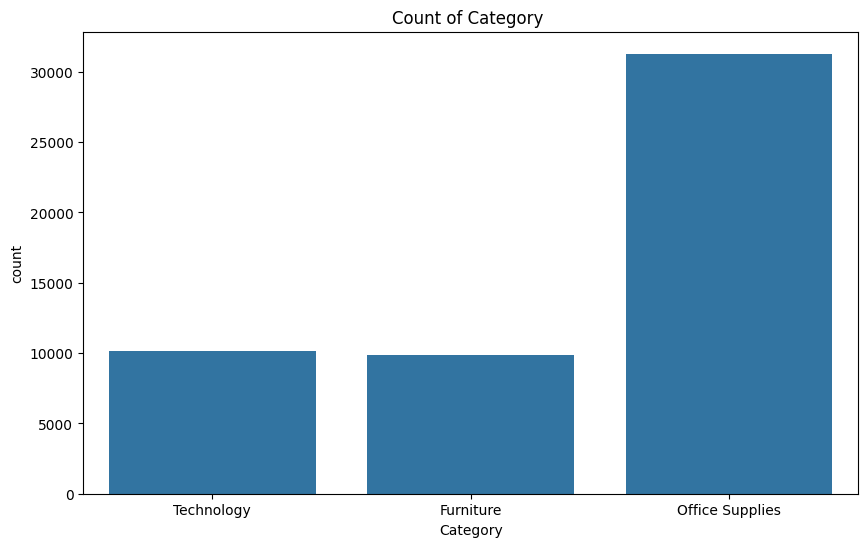

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=df)
plt.title("Count of Category ")
plt.savefig("Count of  Category.jpg")
plt.show()

## Count of Sub-Category for Technology  Category

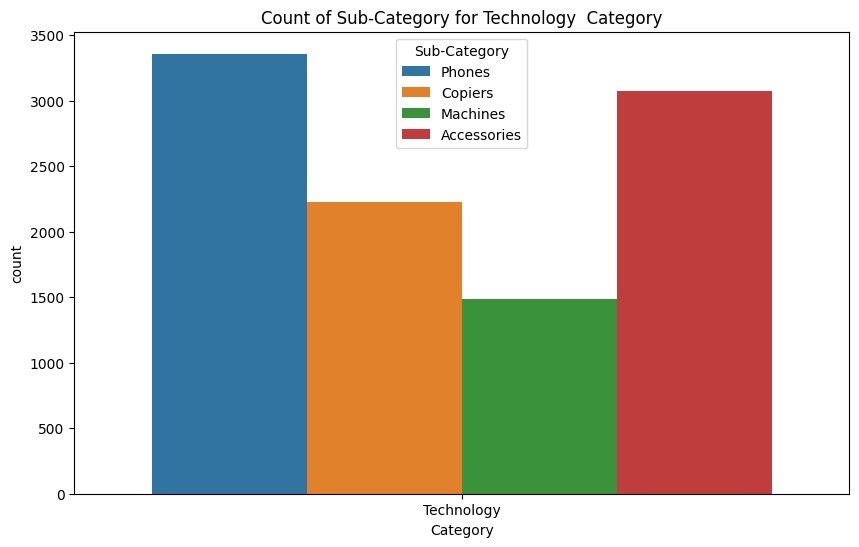

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=df[df['Category']=='Technology'],hue='Sub-Category')
plt.title("Count of Sub-Category for Technology  Category")
plt.savefig("Count of Sub-Category for Technology  Category.jpg")
plt.show()

## Count of Sub-Category for Office Supplies  Category

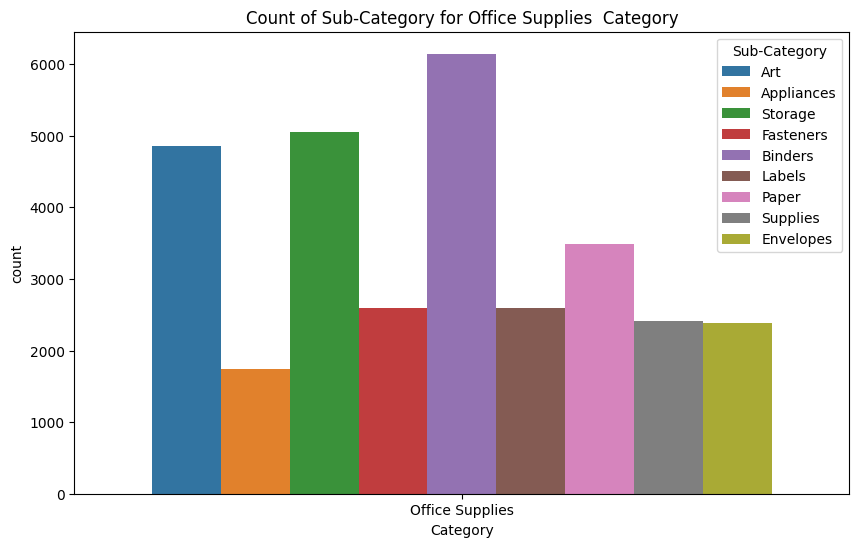

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=df[df['Category']=='Office Supplies'],hue='Sub-Category')
plt.title("Count of Sub-Category for Office Supplies  Category")
plt.savefig("Count of Sub-Category for Office Supplies  Category.jpg")
plt.show()

## Count of Sub-Category for Furniture  Category

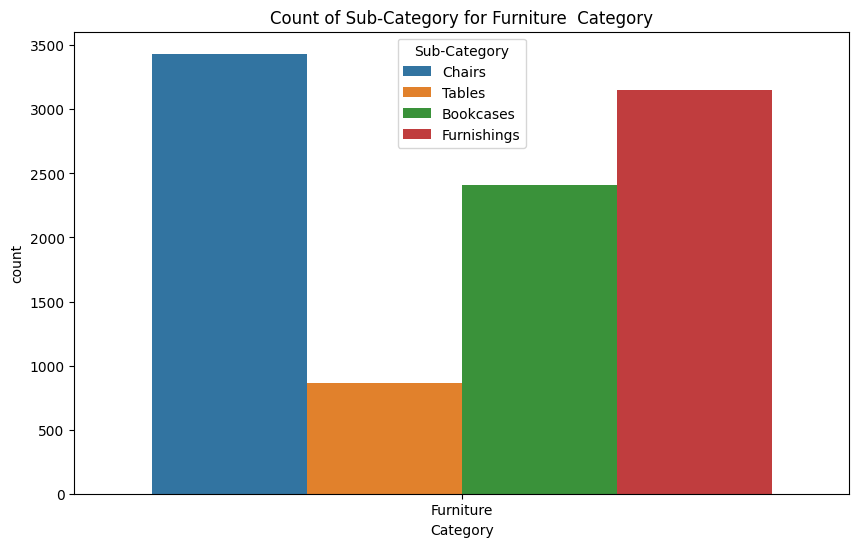

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=df[df['Category']=='Furniture'],hue='Sub-Category')
plt.title("Count of Sub-Category for Furniture  Category")
plt.savefig("Count of Sub-Category for Furniture  Category.jpg")
plt.show()

In [18]:
## Separating Year from Order Date
df['Order Year']=df['Order Date'].dt.year

In [19]:
df['Order Year'].value_counts()

Order Year
2015    17531
2014    13799
2013    10962
2012     8998
Name: count, dtype: int64

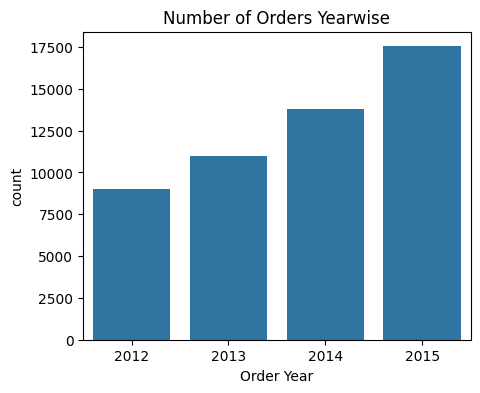

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year",data=df)
plt.title("Number of Orders Yearwise")
plt.savefig("Number of Orders Yearwis.jpg")
plt.show()

In [21]:
df['Category'].value_counts()

Category
Office Supplies    31289
Technology         10141
Furniture           9860
Name: count, dtype: int64

In [22]:
df['Order Priority'].value_counts()

Order Priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

In [23]:
df['Order Priority'].unique()

array(['High', 'Critical', 'Medium', 'Low'], dtype=object)

## Order Priority

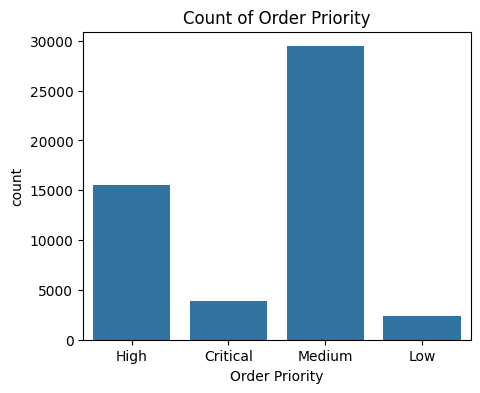

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=df)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority .jpg")
plt.show()

## Profit for Each Product Category

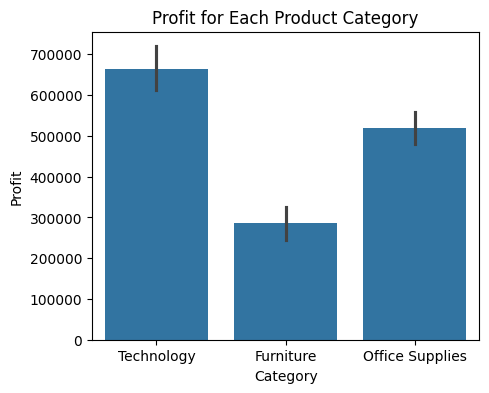

In [25]:
plt.figure(figsize=(5,4))
sns.barplot(x='Category',y='Profit',data=df,estimator='sum')
plt.title("Profit for Each Product Category")
plt.savefig("Profit for Each Product Category.jpg")
plt.show()

## Top 5 Countries By Sales

In [26]:
top_5_Country=df['Country'].value_counts().head(5)
top_5_Country

Country
United States    9994
Australia        2837
France           2827
Mexico           2635
Germany          2063
Name: count, dtype: int64

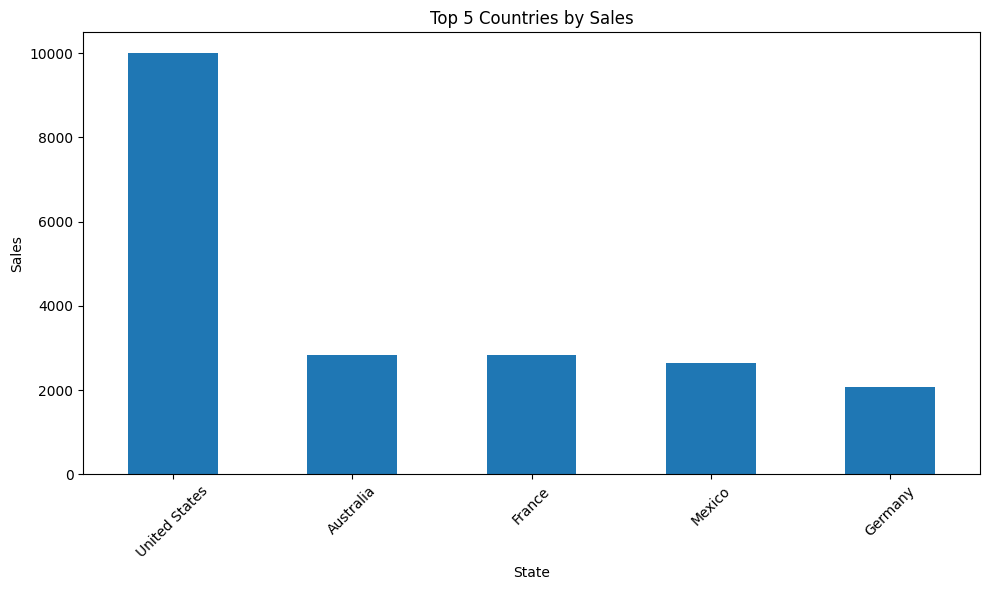

In [27]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_5_Country.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Top 5 Countries by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 5 States by Sales

In [28]:
top_5_state=df['State'].value_counts().head(5)
top_5_state

State
California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
Name: count, dtype: int64

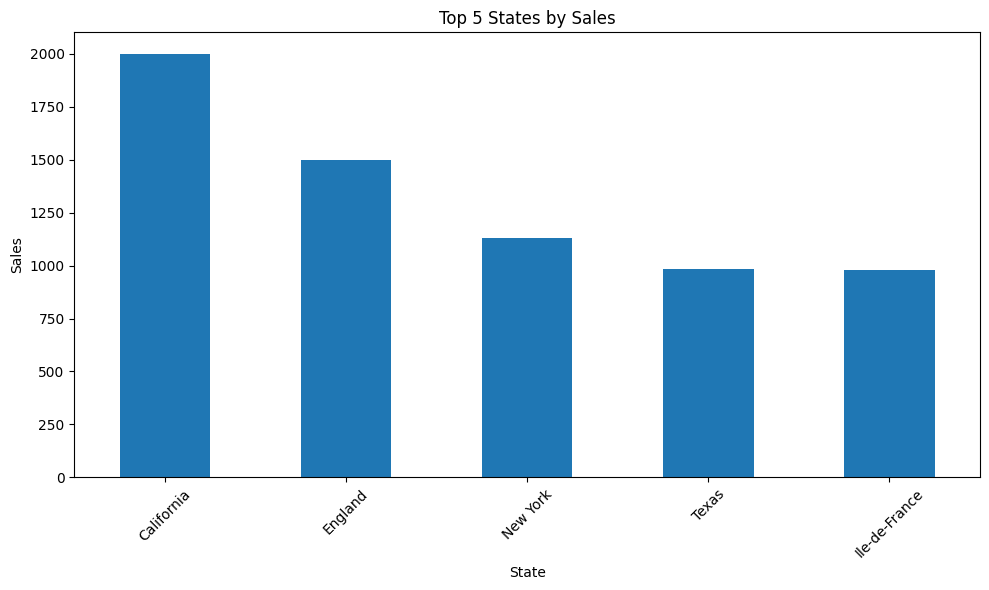

In [29]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_5_state.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Top 5 States by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 5 Cities By Sales

In [30]:
top_5_city=df['City'].value_counts().head(5)
top_5_city

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Name: count, dtype: int64

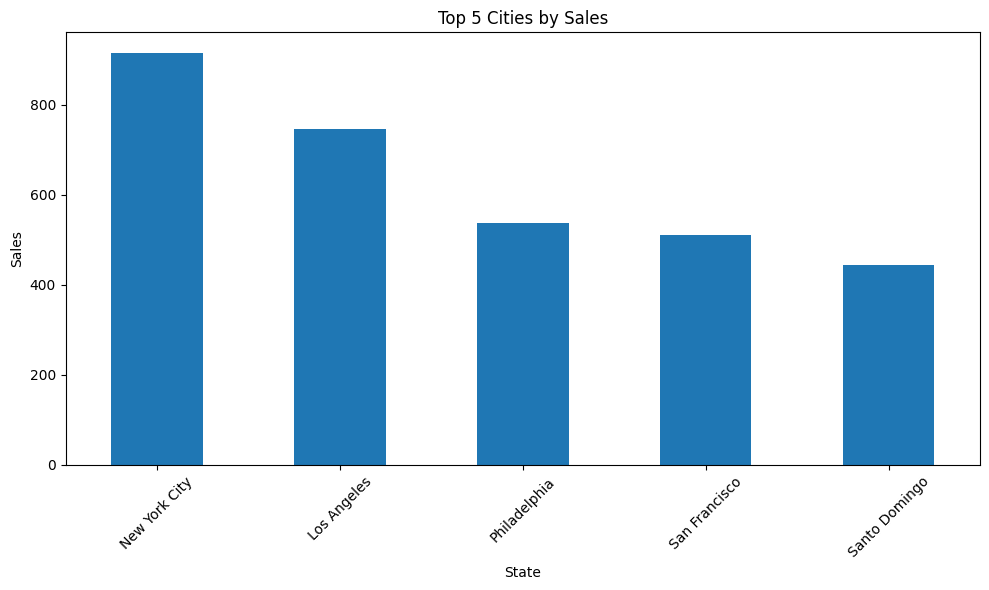

In [31]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_5_city.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights

#### Number of Orders has been increasing each year
#### Consumer has highest Customer Segment
#### Office Supplies has highest Product Category
#### Customers Prefer Standard class Shipping Mode
#### Under Standard Class Shipping Mode customers requirement is coming more from Office Supplies
#### For Technology Category Phones has high number of Sales
#### For Office Supplies Category Binders has high number of Sales
#### For Furniture Category chairs are having more sales
#### Profit wise Technology has more profit compared to others
#### New York , Los Angeles and Philadelphia has high number of Sales by city
#### California , England and New York has high sales by State
#### US , Australia and France has high sales by Country

## Suggestion

#### Company should provide more discount on  New York , Los Angeles and Philadelphia as  purchasing power is more in order to  further increase revenue
#### Company Needs to increase Binders , chairs  and Phones amount for further increase of sales as demand is more
#### Company should Focus more on Consumer as customer segment is highest for this